# Flower classification using sequential class in tensor flow

In [2]:
import os
import cv2
import numpy as np

#for splitting the data into train/test sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tesor flow keras cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#plot images
import matplotlib.pyplot as plt

In [3]:
folder_dir="C:\\Users\\Biancaa. R\\ai workshop\\flowers"

In [4]:
data=[]
label=[]
SIZE=128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"):
            label.append(folder) #for saving what all classes we are having
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue

In [5]:

#data is saved as unsigned 8 bit integer
'''uint: This is short for "unsigned integer." "Unsigned" means that the data type represents only non-negative numbers (zero and positive values). In contrast, a signed integer can represent both positive and negative numbers.

"8": This refers to the number of bits used to store the value. With 8 bits, you can represent 2^8 = 256 different values, which is why uint8 can represent values from 0 to 255.'''
data[0]

array([[[137, 137, 135],
        [145, 145, 145],
        [148, 148, 149],
        ...,
        [153, 153, 151],
        [154, 154, 152],
        [154, 154, 154]],

       [[135, 135, 133],
        [144, 144, 143],
        [147, 147, 147],
        ...,
        [154, 154, 152],
        [153, 153, 151],
        [151, 151, 151]],

       [[134, 133, 129],
        [142, 141, 139],
        [146, 145, 143],
        ...,
        [156, 156, 155],
        [152, 152, 150],
        [148, 148, 148]],

       ...,

       [[ 43,  46,  25],
        [ 43,  46,  25],
        [ 43,  46,  25],
        ...,
        [129, 125, 124],
        [128, 124, 123],
        [130, 126, 125]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 45,  48,  27],
        ...,
        [132, 128, 127],
        [130, 126, 125],
        [130, 126, 125]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 45,  48,  27],
        ...,
        [133, 129, 128],
        [131, 127, 126],
        [131, 127, 126]]

In [6]:
data_arr=np.array(data)
label_arr=np.array(label)

In [7]:
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,5) #becaue we have 5 different categories
x=data_arr/255
x[0]


array([[[0.5372549 , 0.5372549 , 0.52941176],
        [0.56862745, 0.56862745, 0.56862745],
        [0.58039216, 0.58039216, 0.58431373],
        ...,
        [0.6       , 0.6       , 0.59215686],
        [0.60392157, 0.60392157, 0.59607843],
        [0.60392157, 0.60392157, 0.60392157]],

       [[0.52941176, 0.52941176, 0.52156863],
        [0.56470588, 0.56470588, 0.56078431],
        [0.57647059, 0.57647059, 0.57647059],
        ...,
        [0.60392157, 0.60392157, 0.59607843],
        [0.6       , 0.6       , 0.59215686],
        [0.59215686, 0.59215686, 0.59215686]],

       [[0.5254902 , 0.52156863, 0.50588235],
        [0.55686275, 0.55294118, 0.54509804],
        [0.57254902, 0.56862745, 0.56078431],
        ...,
        [0.61176471, 0.61176471, 0.60784314],
        [0.59607843, 0.59607843, 0.58823529],
        [0.58039216, 0.58039216, 0.58039216]],

       ...,

       [[0.16862745, 0.18039216, 0.09803922],
        [0.16862745, 0.18039216, 0.09803922],
        [0.16862745, 0

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [9]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [11]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=8
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

C:\Users\Biancaa. R\AppData\Local\Temp\ipykernel_17968\2020909439.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/8
109/109 [==============================] - 182s 2s/step - loss: 1.5454 - accuracy: 0.3155 - val_loss: 1.3940 - val_accuracy: 0.3795
Epoch 2/8
109/109 [==============================] - 212s 2s/step - loss: 1.3419 - accuracy: 0.4065 - val_loss: 1.2211 - val_accuracy: 0.4418
Epoch 3/8
109/109 [==============================] - 235s 2s/step - loss: 1.2327 - accuracy: 0.4408 - val_loss: 1.1430 - val_accuracy: 0.5456
Epoch 4/8
109/109 [==============================] - 245s 2s/step - loss: 1.1803 - accuracy: 0.4755 - val_loss: 1.1658 - val_accuracy: 0.4948
Epoch 5/8
109/109 [==============================] - 395s 4s/step - loss: 1.1411 - accuracy: 0.5029 - val_loss: 1.0875 - val_accuracy: 0.5386
Epoch 6/8
109/109 [==============================] - 264s 2s/step - loss: 1.1230 - accuracy: 0.5162 - val_loss: 1.1226 - val_accuracy: 0.5409
Epoch 7/8
109/109 [==============================] - 275s 3s/step - loss: 1.0906 - accuracy: 0.5387 - val_loss: 1.0970 - val_accuracy: 0.5536
Epoch 

28/28 [==============================] - 19s 695ms/step


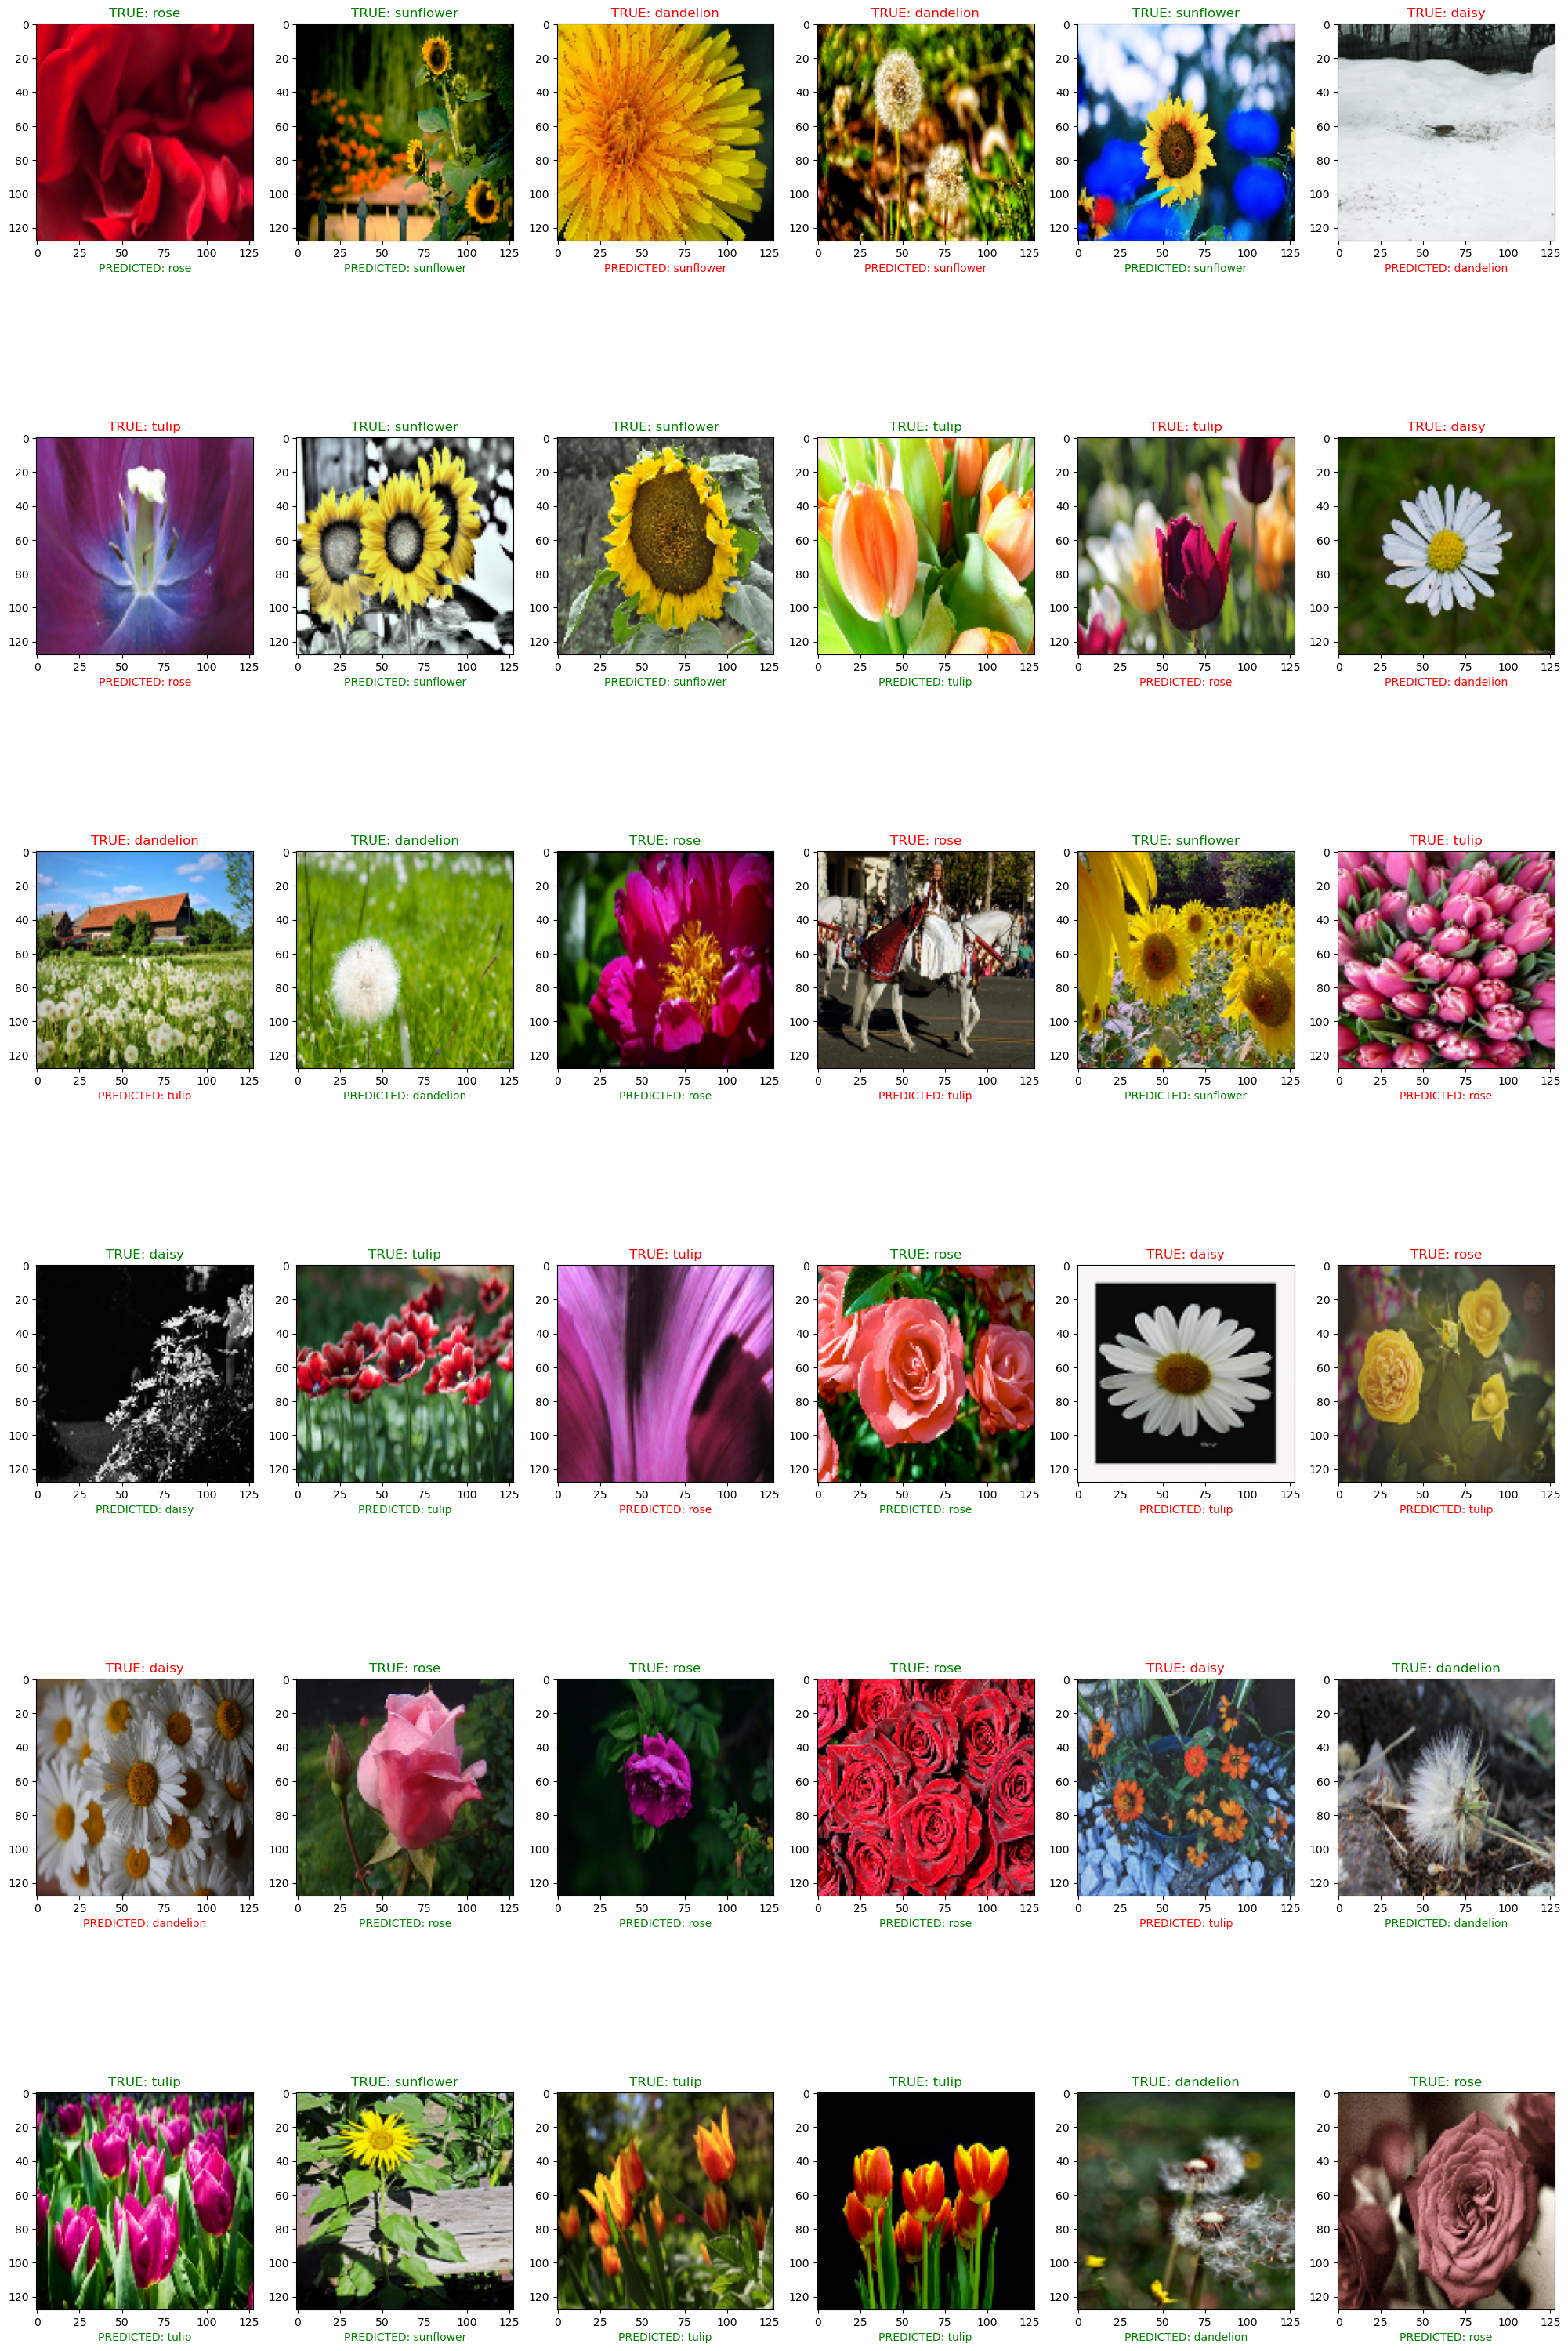

In [12]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')